In [2]:
import json
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pprint


run_dir = os.path.join("runs", "run_1")
history_json = os.path.join(run_dir, "training_results.json")
# consolidated_kfold_json = os.path.join(run_dir, "consolidated_kf_results.json")
consolidated_training_json = os.path.join(run_dir, "consolidated_training_results.json")

In [3]:
print(history_json)

runs\run_1\training_results.json


In [4]:
def extract_evaluation_data(data, source_label):
    rows = []
    for model_name, datasets in data.items():
        for dataset_name, metrics in datasets.items():
            row = {
                "Source": source_label,
                "Model": model_name,
                "Dataset": dataset_name,
                "Train_Size": metrics.get("train_dataset_size"),
                "Val_Size": metrics.get("val_dataset_size"),
                "Final_Train_Accuracy": metrics["history"]["accuracy"][-1] if "accuracy" in metrics["history"] else None,
                "Final_Val_Accuracy": metrics["history"]["val_accuracy"][-1] if "val_accuracy" in metrics["history"] else None,
                "Evaluation_Accuracy": metrics["evaluation"]["accuracy"] if "evaluation" in metrics else None,
                "Evaluation_Loss": metrics["evaluation"]["loss"] if "evaluation" in metrics else None,
                "Evaluation_AUC": metrics["evaluation"]["auc"] if "evaluation" in metrics else None,
                "Evaluation_Precision": metrics["evaluation"]["precision"] if "evaluation" in metrics else None,
                "Evaluation_Recall": metrics["evaluation"]["recall"] if "evaluation" in metrics else None,
                "Evaluation_F1_Score": metrics["evaluation"]["f1_score"] if "evaluation" in metrics else None,
                "Training_Time": metrics.get("training_time"),
                "Optimal_Threshold": metrics.get("optimal_threshold")
            }
            rows.append(row)
    return rows

def plot_metric_chart(df, metric):
    # Set plot style
    sns.set(style="whitegrid")

    # Create a bar plot for Evaluation Accuracy comparison across models and datasets
    plt.figure(figsize=(14, 8))
    plot = sns.barplot(
        data=df,
        x="Model",
        y=metric,
        hue="Dataset",
        palette="viridis"
    )

    # Customize the plot
    plot.set_title(f"Model Performance Comparison ({metric})")
    plot.set_ylabel(metric)
    plot.set_xlabel("Model")
    plt.xticks(rotation=45)
    plt.legend(title="Dataset")
    plt.tight_layout()

    # Show plot
    plt.savefig(os.path.join(run_dir, f"performance_comparison_{metric}.png"))
    plt.show()

In [5]:

with open(history_json, 'r') as f1, open(consolidated_training_json, 'r') as f2:
    training_data = json.load(f1)
    consolidated_training_data = json.load(f2)

# Function to extract accuracy data from JSON


# Extract data from both files
rows1 = extract_evaluation_data(training_data, "normal")
rows2 = extract_evaluation_data(consolidated_training_data, "consolidated")

# Combine data into a single DataFrame
all_rows = rows1 + rows2
df = pd.DataFrame(all_rows)


In [6]:

# Save to CSV
output_path = os.path.join(run_dir, 'consolidated_run_data.csv')
df.to_csv(output_path, index=False)

print(f"Consolidated CSV file saved to {output_path}")


Consolidated CSV file saved to runs\run_1\consolidated_run_data.csv


In [7]:
# Load the CSV file
df = pd.read_csv(output_path)



C:\Users\tselm\AppData\Local\Temp\ipykernel_34684\3819365964.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


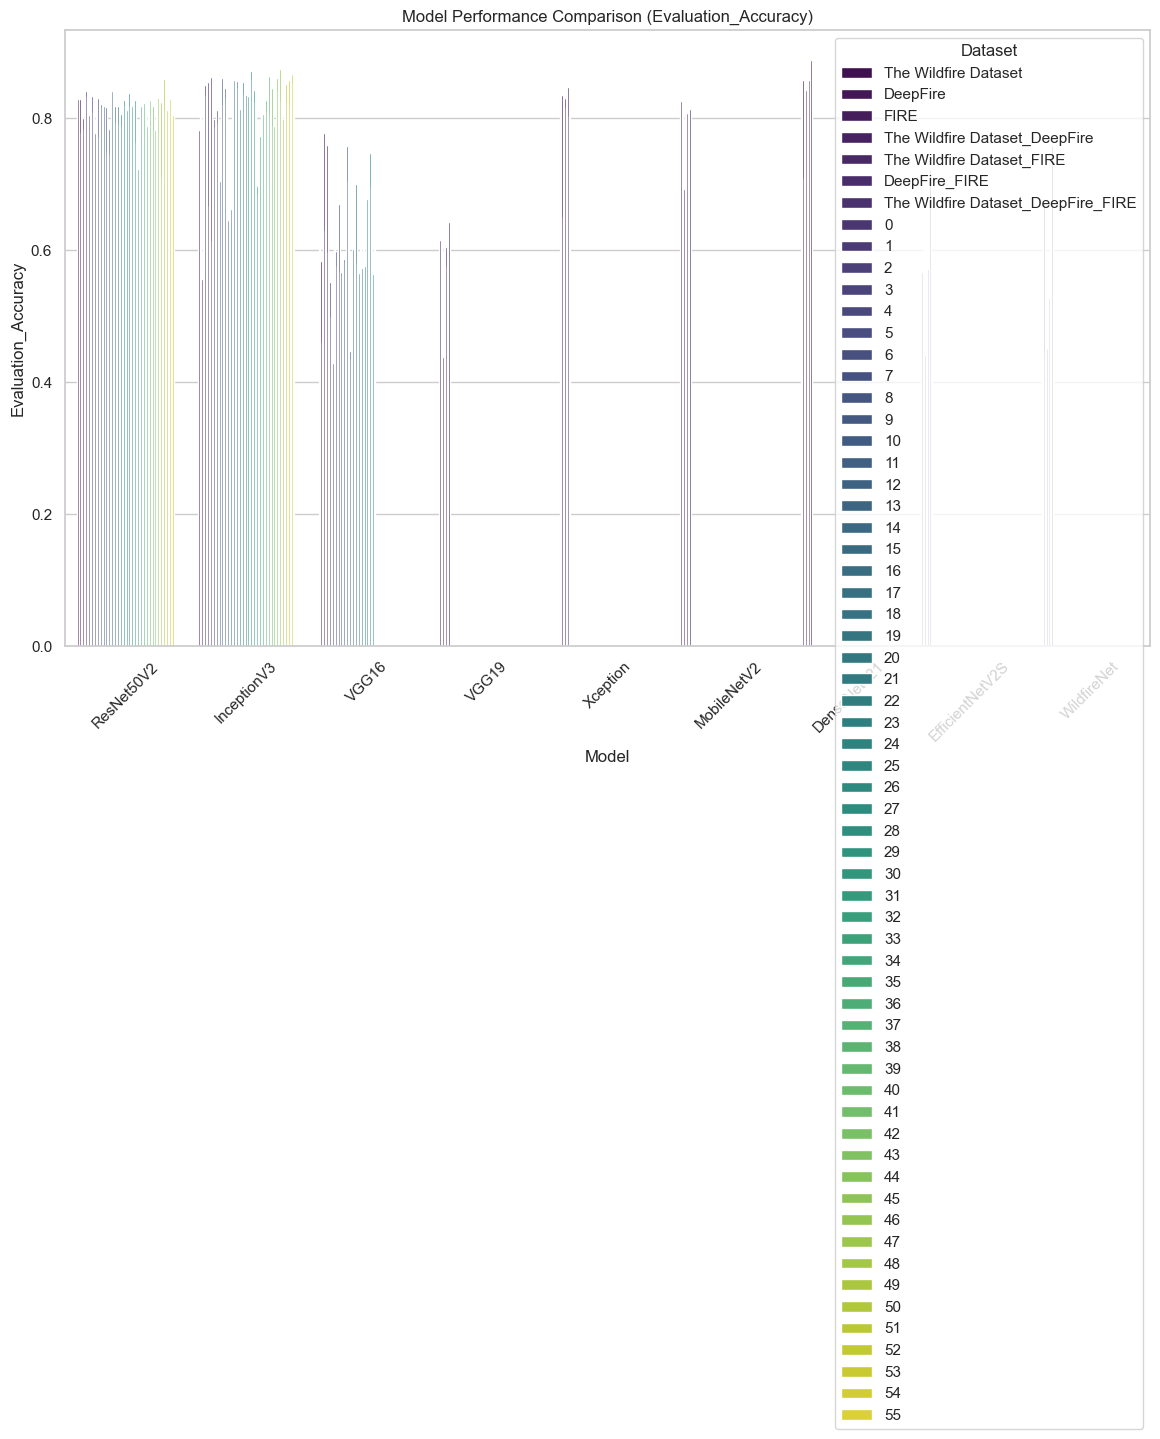

C:\Users\tselm\AppData\Local\Temp\ipykernel_34684\3819365964.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


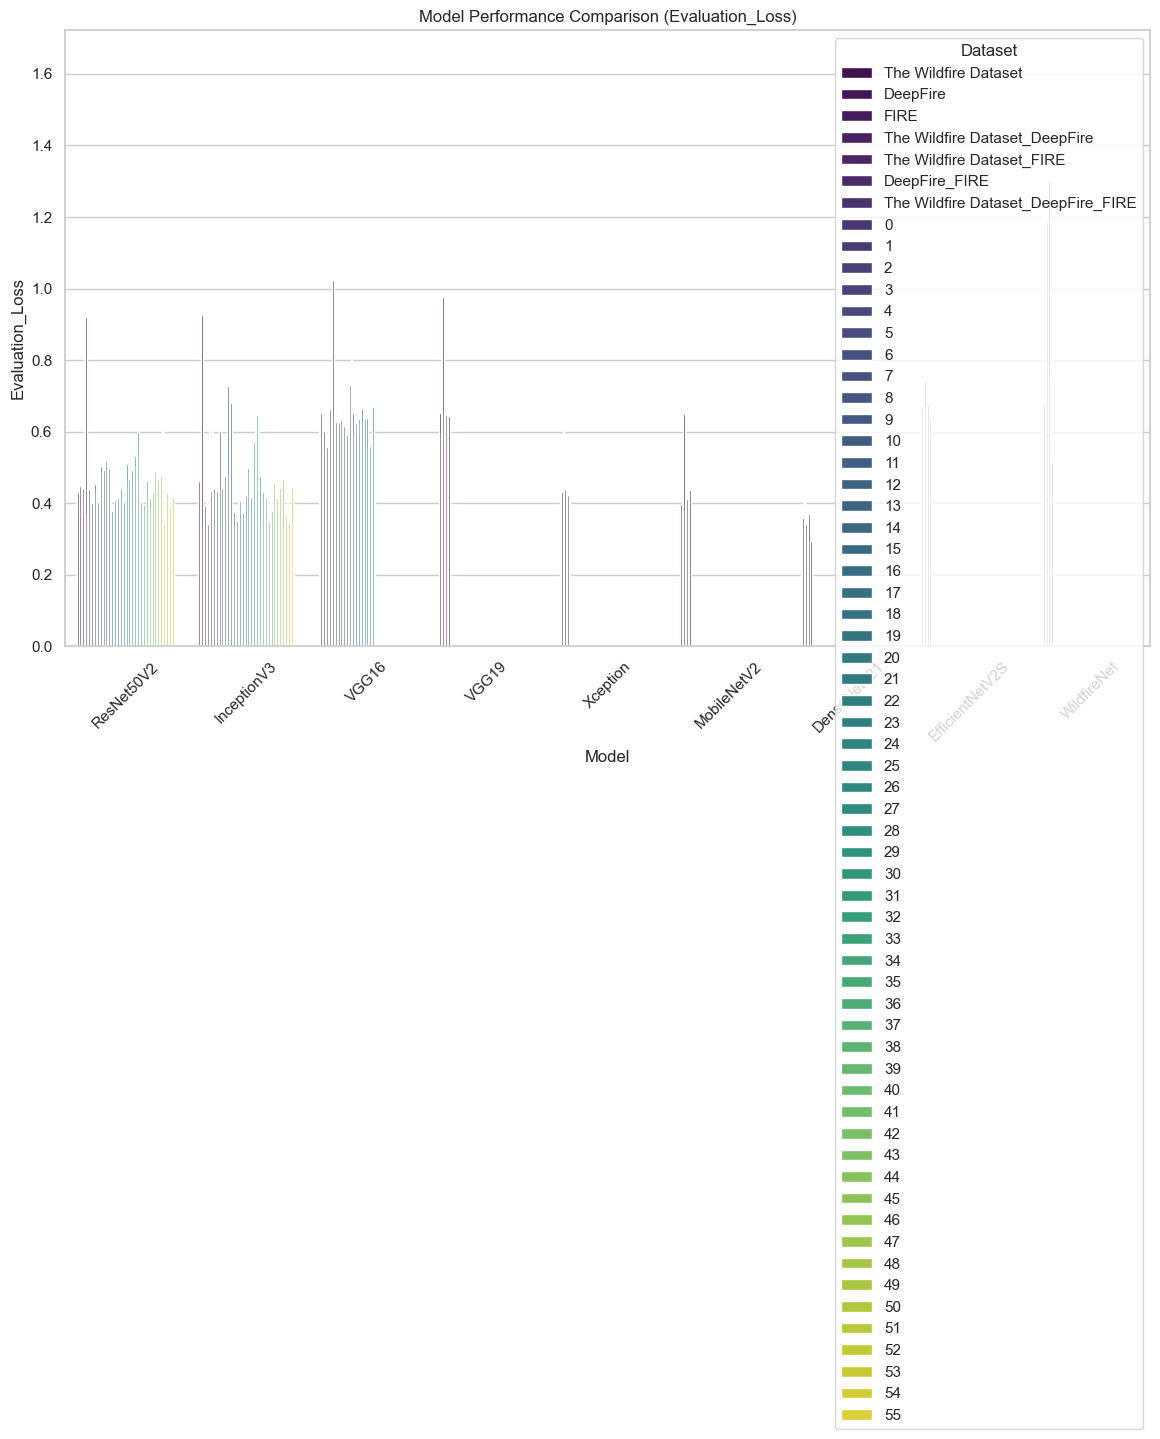

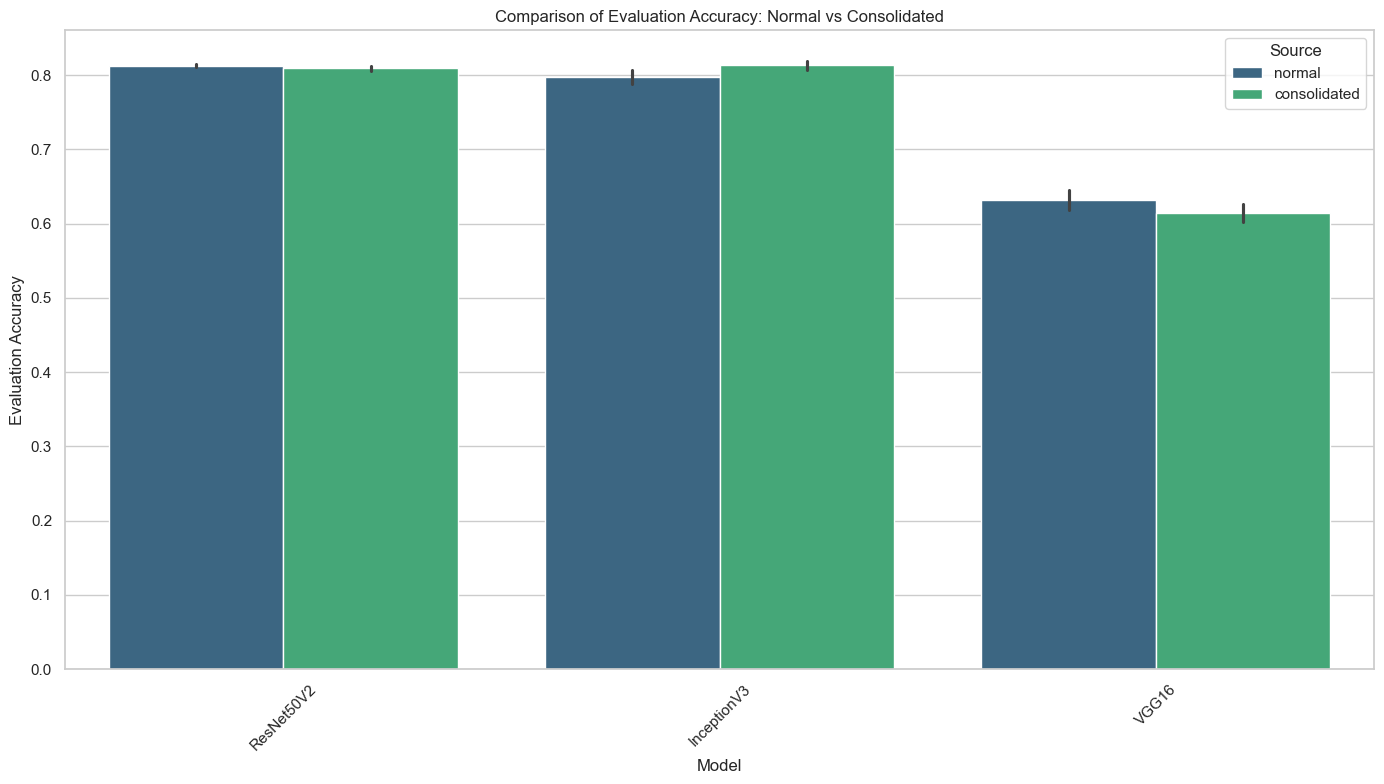

In [8]:

# Ensure numeric columns are correctly typed
numeric_cols = ["Final_Train_Accuracy", "Final_Val_Accuracy", "Evaluation_Accuracy"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Plot the Evaluation Accuracy comparison
plot_metric_chart(df, "Evaluation_Accuracy")

# Plot the Evaluation Loss comparison
plot_metric_chart(df, "Evaluation_Loss")
# Split the data by source
df_normal = df[df["Source"] == "normal"]
df_consolidated = df[df["Source"] == "consolidated"]

# Create comparison dataframe
comparison_df = df_normal.merge(df_consolidated, on="Model", suffixes=("_normal", "_consolidated"))

# Compare normal to consolidated accuracy on each model
# Melt the data for easier plotting
melted_df = pd.melt(
    comparison_df,
    id_vars=["Model"],
    value_vars=["Evaluation_Accuracy_normal", "Evaluation_Accuracy_consolidated"],
    var_name="Source",
    value_name="Evaluation_Accuracy"
)

# Rename the Source values for better readability
melted_df["Source"] = melted_df["Source"].str.replace("Evaluation_Accuracy_", "")

# Plot side-by-side bar chart for normal and consolidated Evaluation Accuracy
plt.figure(figsize=(14, 8))
sns.barplot(
    data=melted_df,
    x="Model",
    y="Evaluation_Accuracy",
    hue="Source",
    palette="viridis"
)

# Customize the plot
plt.title("Comparison of Evaluation Accuracy: Normal vs Consolidated")
plt.ylabel("Evaluation Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()
# plt.savefig(os.path.join(run_dir, "evaluation_accuracy_comparison.png"))
plt.show()


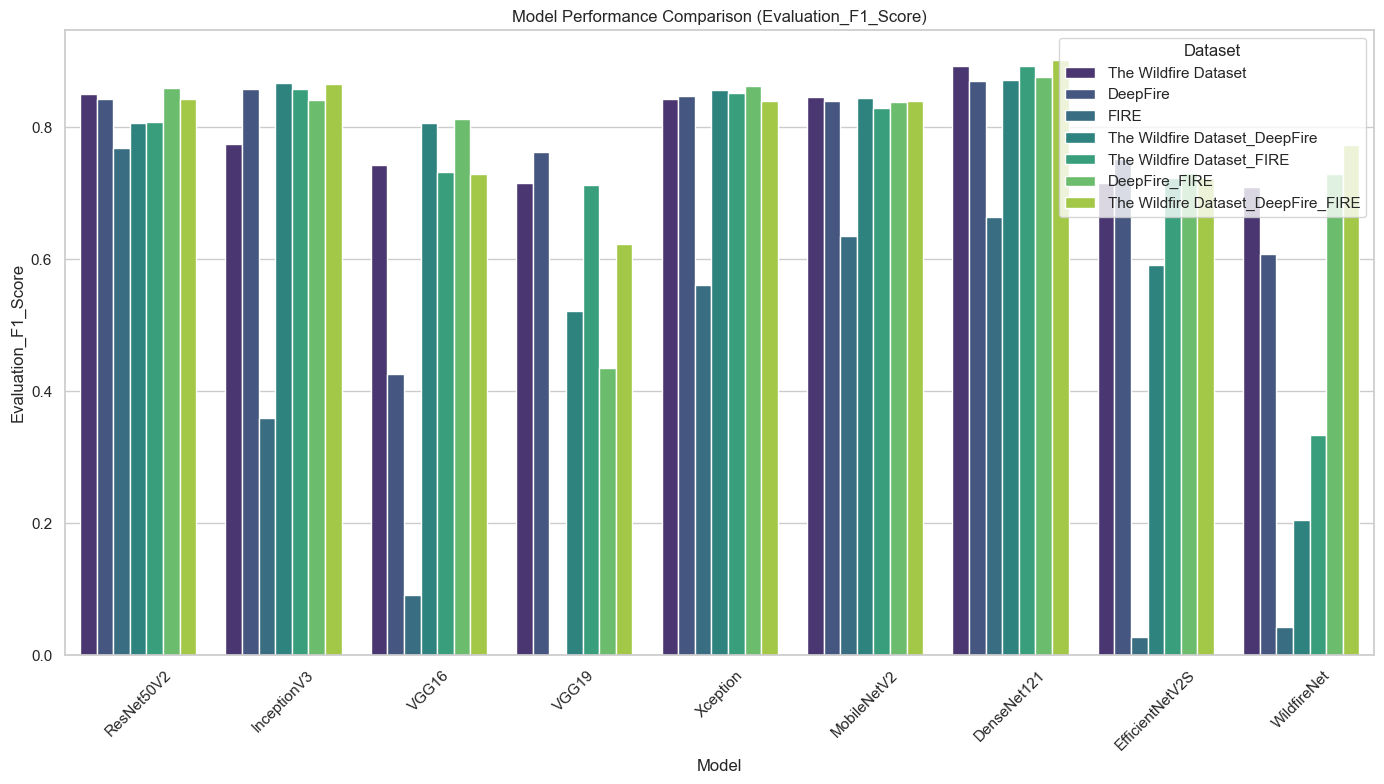

In [7]:

plot_metric_chart(df, "Evaluation_F1_Score")

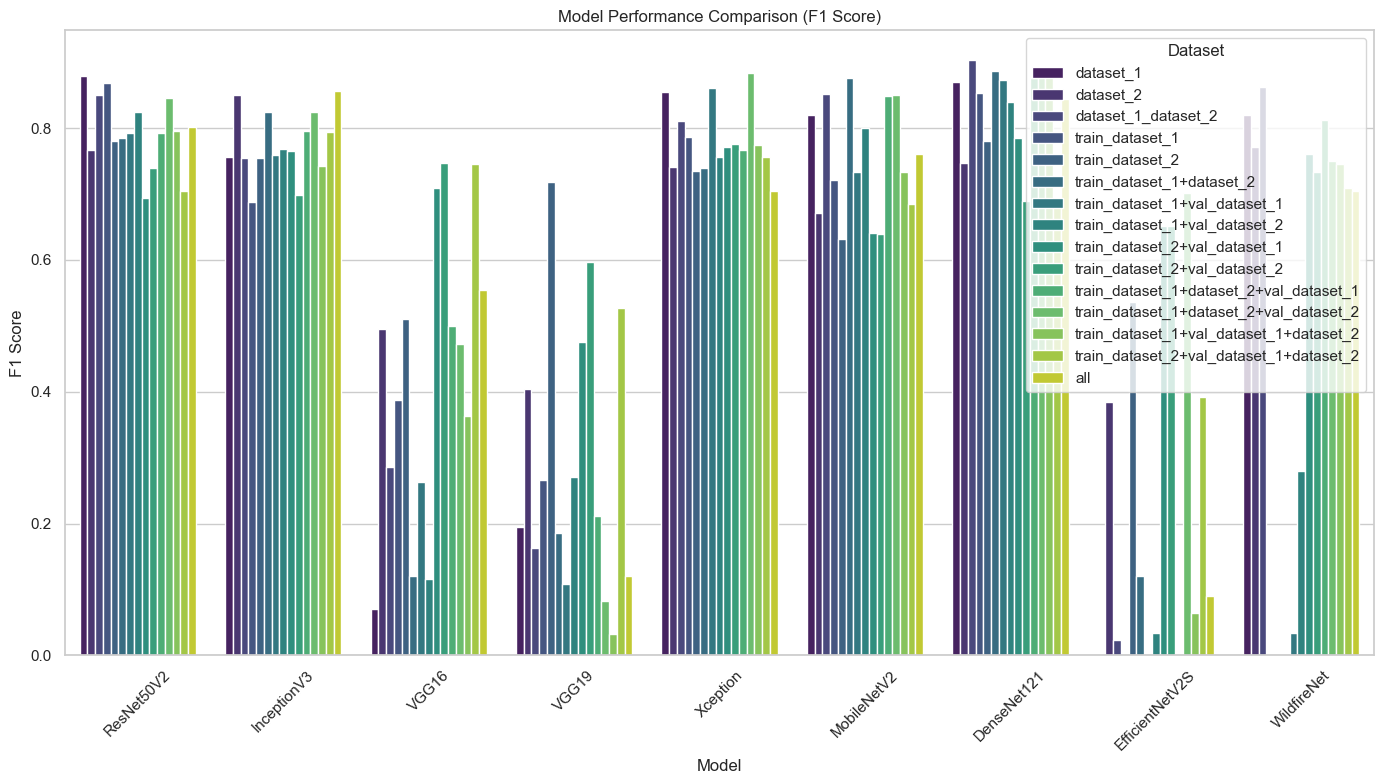

In [48]:
# Ensure numeric columns are correctly typed
df["Evaluation_F1_Score"] = pd.to_numeric(df["Evaluation_F1_Score"], errors='coerce')

# Create a bar plot for F1 Score comparison across models and datasets
plt.figure(figsize=(14, 8))
plot_f1 = sns.barplot(
    data=df,
    x="Model",
    y="Evaluation_F1_Score",
    hue="Dataset",
    palette="viridis"
)

# Customize the plot
plot_f1.set_title("Model Performance Comparison (F1 Score)")
plot_f1.set_ylabel("F1 Score")
plot_f1.set_xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.tight_layout()

# Show plot
# plt.savefig(os.path.join(run_dir, "f1_score_comparison.png"))
plt.show()

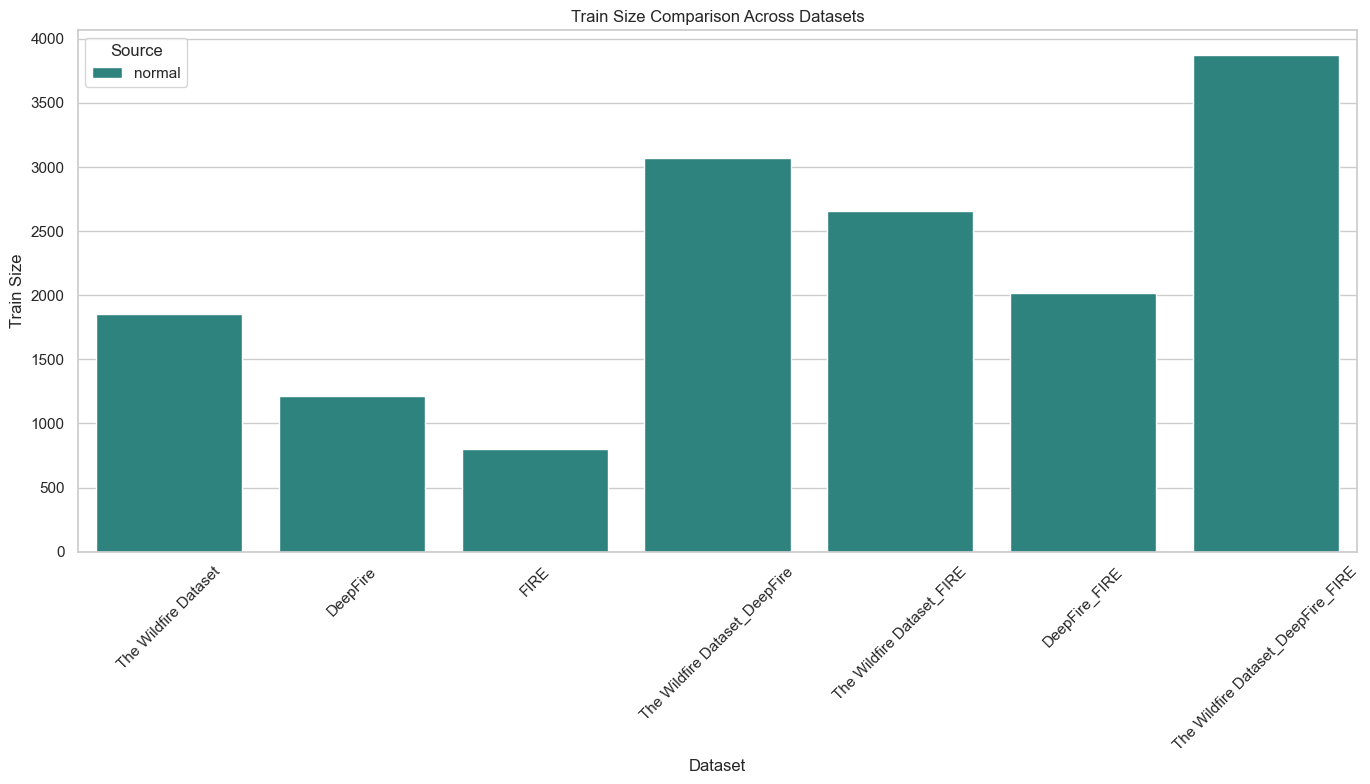

In [8]:
# Plot the Train Size comparison
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,
    x="Dataset",
    y="Train_Size",
    hue="Source",
    palette="viridis"
)

# Customize the plot
plt.title("Train Size Comparison Across Datasets")
plt.ylabel("Train Size")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()

# Show plot
plt.show()

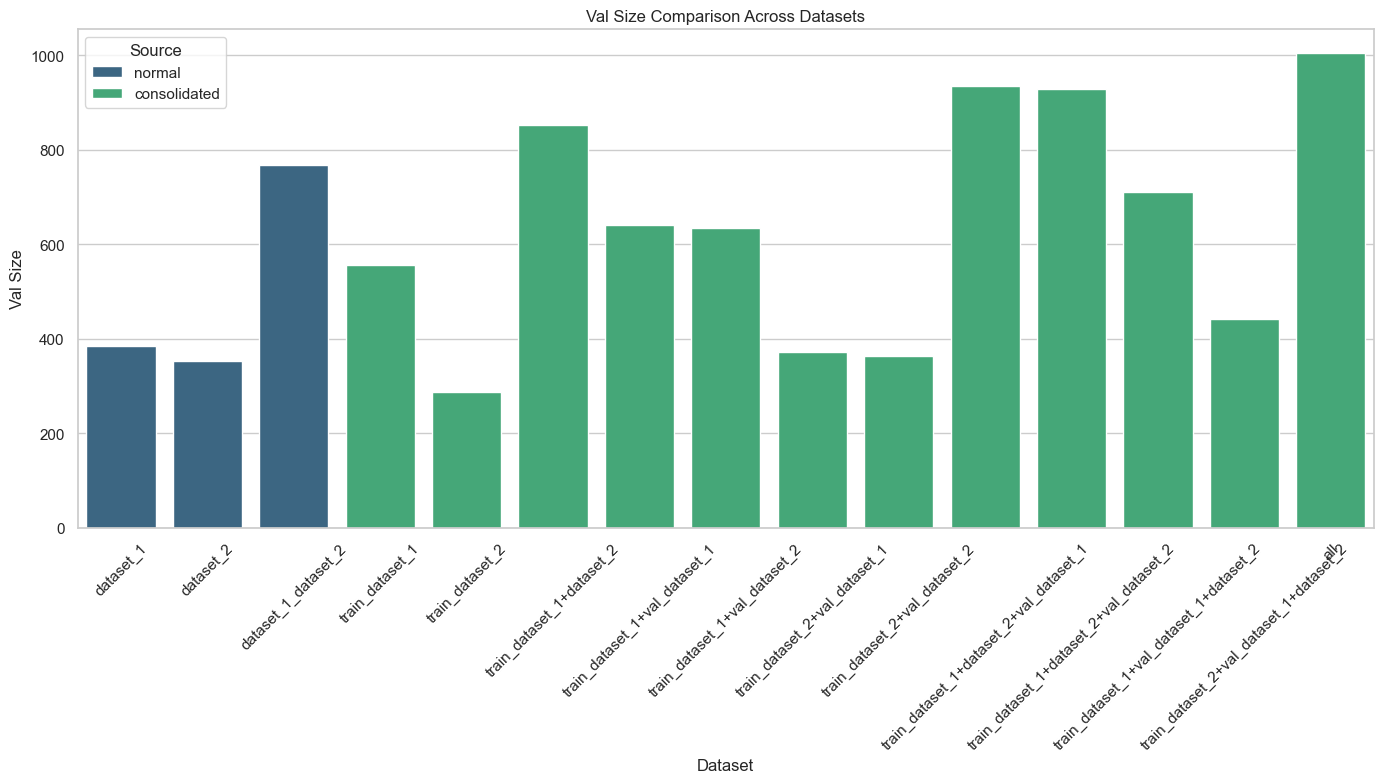

In [62]:
# Plot the Train Size comparison
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,
    x="Dataset",
    y="Val_Size",
    hue="Source",
    palette="viridis"
)

# Customize the plot
plt.title("Val Size Comparison Across Datasets")
plt.ylabel("Val Size")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()

# Show plot
plt.show()

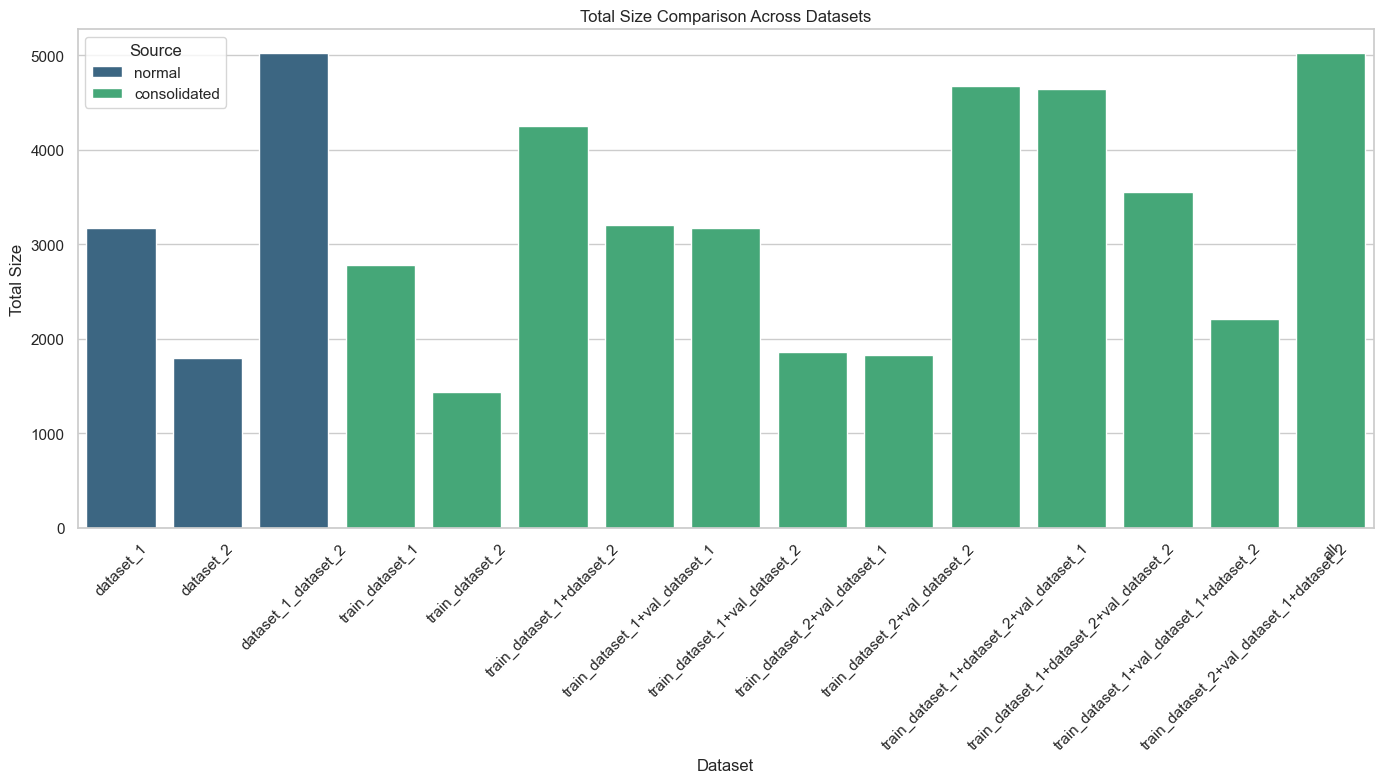

In [63]:
# Calculate total sizes
df['Total_Size'] = df['Train_Size'] + df['Val_Size']

# Plot the total sizes across datasets
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,
    x='Dataset',
    y='Total_Size',
    hue='Source',
    palette='viridis'
)

# Customize the plot
plt.title('Total Size Comparison Across Datasets')
plt.ylabel('Total Size')
plt.xlabel('Dataset')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()

# Show plot
plt.show()

C:\Users\tselm\AppData\Local\Temp\ipykernel_28608\3819365964.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


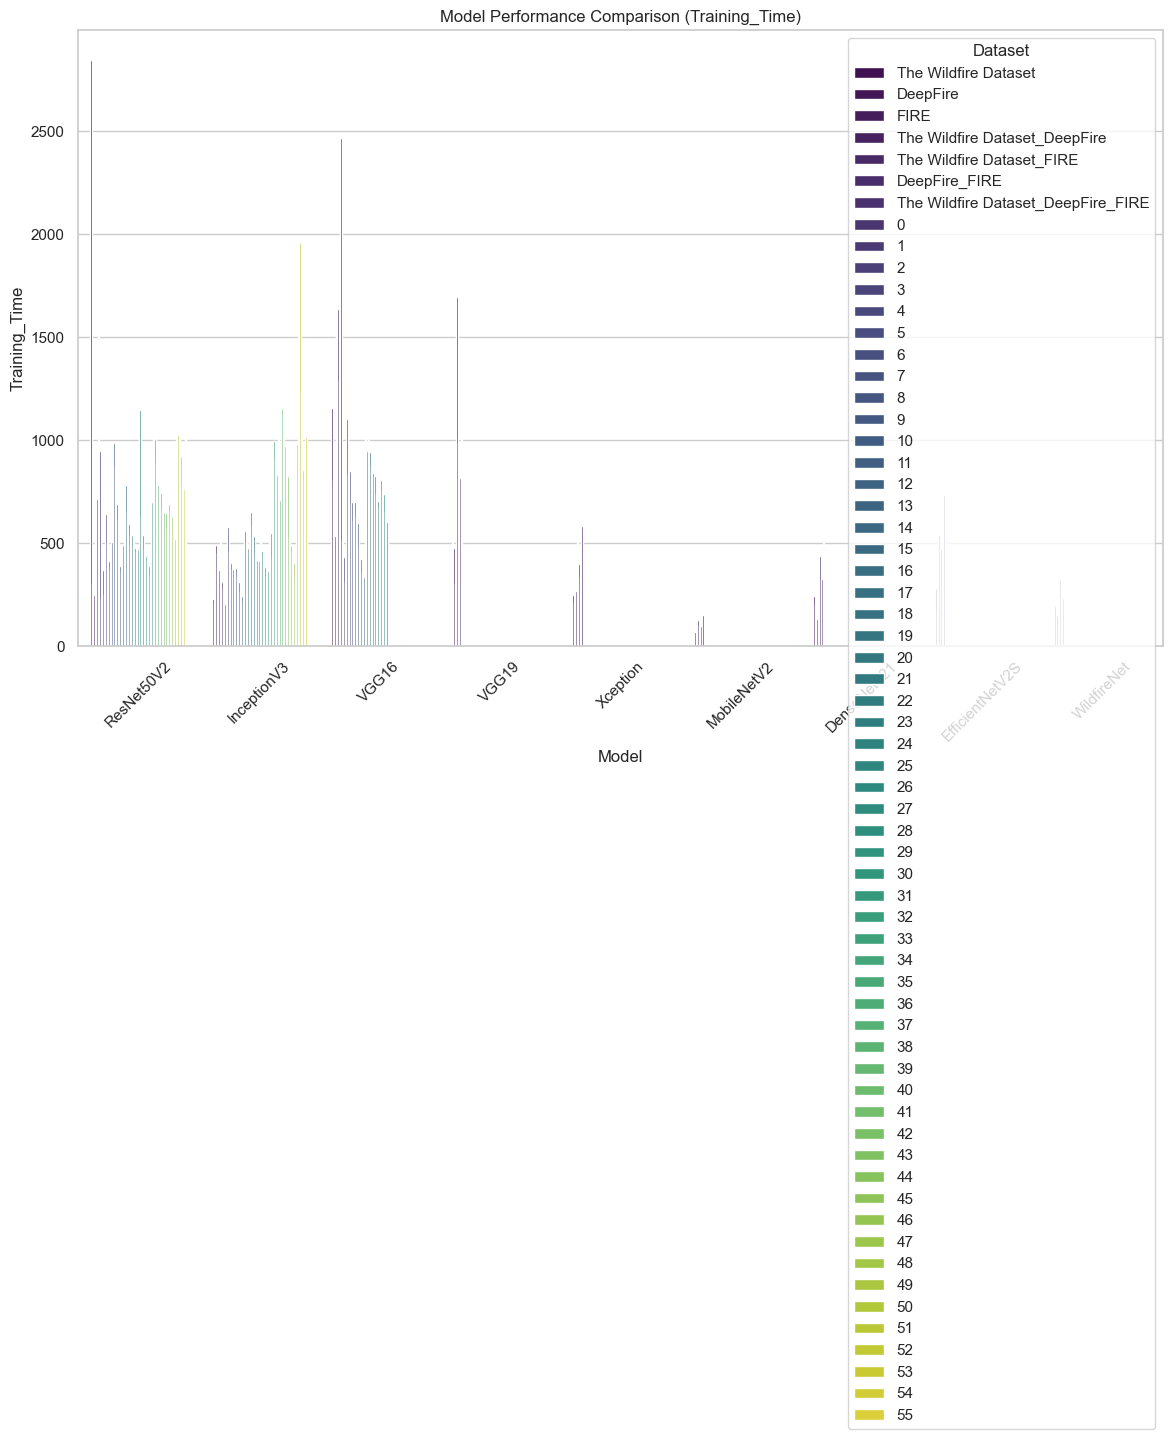

In [7]:
plot_metric_chart(df, "Training_Time")